In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Teoria

## Lentes Bayes

In [11]:
df = pd.read_excel('LentesBayes.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            24 non-null     int64 
 1   Edad          24 non-null     object
 2   Prescripcion  24 non-null     object
 3   Astigmatismo  24 non-null     object
 4   Lagrimas      24 non-null     object
 5   Diagnostico   24 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.3+ KB


In [6]:
df

,Id,Edad,Prescripcion,Astigmatismo,Lagrimas,Diagnostico
0,1,Joven,Hipermetropía,NO,Normal,Lentes_Blandos
1,2,Joven,Miopía,NO,Normal,Lentes_Blandos
2,9,pre_presb,Hipermetropía,NO,Normal,Lentes_Blandos
3,11,pre_presb,Miopía,NO,Normal,Lentes_Blandos
4,18,Presbicia,Hipermetropía,NO,Normal,Lentes_Blandos
5,3,Joven,Hipermetropía,SI,Normal,Lentes_Duros
6,4,Joven,Miopía,SI,Normal,Lentes_Duros
7,10,pre_presb,Miopía,SI,Normal,Lentes_Duros
8,17,Presbicia,Miopía,SI,Normal,Lentes_Duros
9,5,Joven,Hipermetropía,NO,Reducida,No_usar_Lentes


In [12]:
df = df.drop(columns='Id')
df['Astigmatismo'] = df['Astigmatismo'].map({'SI': 1, 'NO': 0})
df['Edad'] = df['Edad'].map({'Joven':0, 'pre_presb':1, 'Presbicia':2})
df['Lagrimas'] = df['Lagrimas'].map({'Normal':0, 'Reducida':1})
df['Diagnostico'] = df['Diagnostico'].map({'No_usar_Lentes':0, 'Lentes_Blandos':1, 'Lentes_Duros':2})
df['Prescripcion'] = df['Prescripcion'].map({'Miopía':0, 'Hipermetropía':1})

In [15]:
y = df['Diagnostico']
X = df.drop(columns='Diagnostico')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 12 points : 2


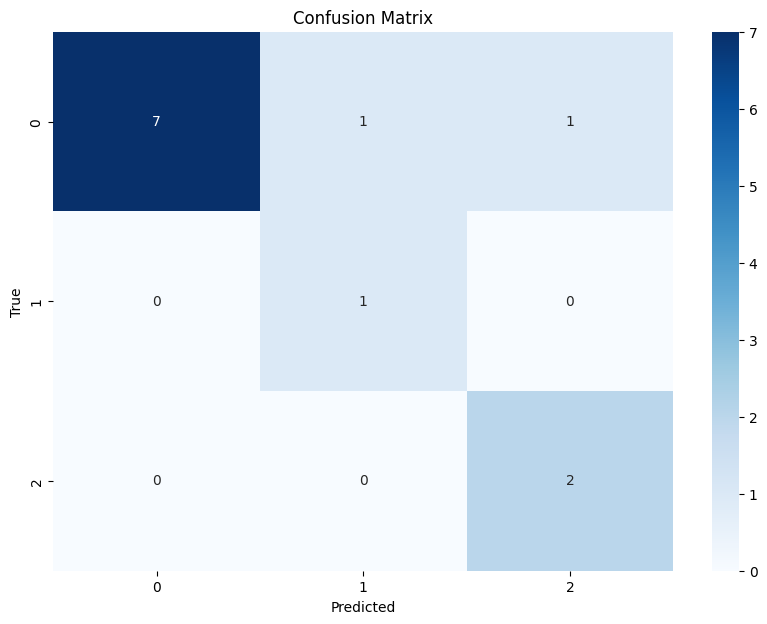

In [16]:
# Visualize the data y print matrix confussion y acurracy score
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')

F1 Score: 0.85
Accuracy: 0.83


### Petalos

In [21]:
df2 = pd.read_csv(r'C:\Users\nacho\Documents\Facultad\Mineria de Datos\Datos\iris.csv')

In [23]:
df2['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
# map the column class with numbers from 0 to 2
df2['class'] = df2['class'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [25]:
y = df2['class']
X = df2.drop(columns='class')
# Splitear la data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=33)
# Defino mi Gaussiana
gnb = GaussianNB()
# Predigo mis resultados
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 53 points : 2


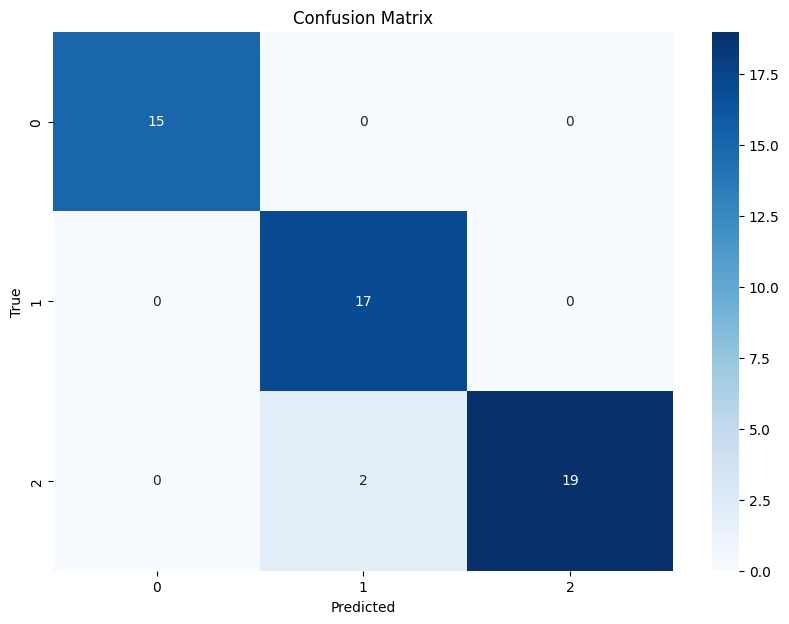

Accuracy: 0.96


In [27]:
# Matriz de confusion y accuracy score
cm2 = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Text(0.5, 1.0, 'PCA of Iris Dataset')

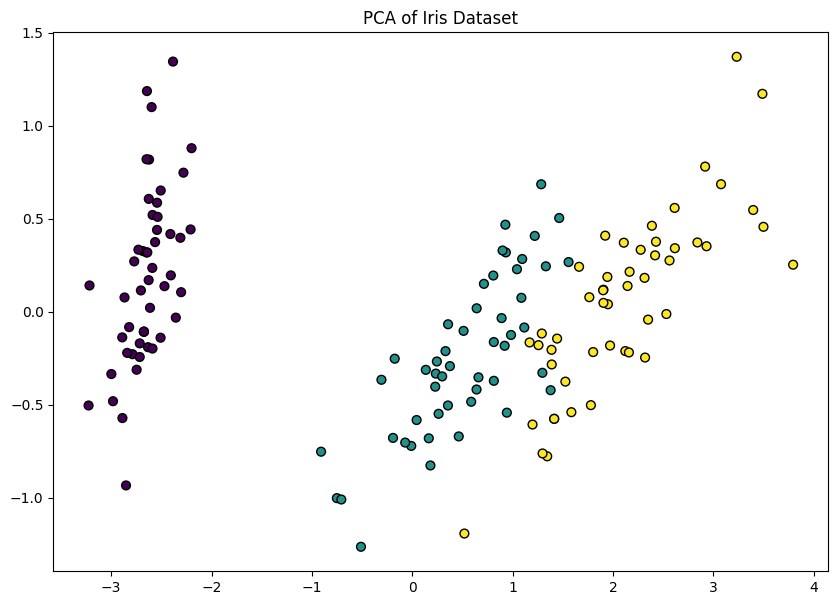

In [29]:
# Visualize the data with a plot with gaussians of gnb predicts and real data
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA of Iris Dataset')


# Práctica

## Ejercicio 4

In [ ]:
import numpy as np
from scipy.stats import norm

# Datos
prob_color = {
    "Manzana": {"Amarillo": 0.8, "Mezcla": 0.0, "Rojo": 0.2},
    "Pera": {"Amarillo": 0.1, "Mezcla": 0.6, "Rojo": 0.3},
}

# Parámetros de la distribución normal para Esfericidad
params_esfericidad = {
    "Manzana": {"mu": 0.5, "sigma": 0.3},
    "Pera": {"mu": 0.8, "sigma": 0.2},
}


### Inciso a)

In [ ]:
# Probabilidades
prob = {"Manzana": 0.5, "Pera": 0.5}

# Función para calcular la probabilidad de la esfericidad
def prob_esfericidad(x, mu, sigma):
    return norm.pdf(x, loc=mu, scale=sigma)

# Ejemplos a clasificar
ejemplos = [
    {"Color": "Amarillo", "Esfericidad": 0.6},
    {"Color": "Mezcla", "Esfericidad": 0.8},
]

# Clasificación
for i, ejemplo in enumerate(ejemplos):
    color = ejemplo["Color"]
    esfericidad = ejemplo["Esfericidad"]

    # Calcular las probabilidades para cada clase
    prob_manzana = (
        prob_color["Manzana"][color]
        * prob_esfericidad(esfericidad, params_esfericidad["Manzana"]["mu"], params_esfericidad["Manzana"]["sigma"])
        * prob["Manzana"]
    )
    prob_pera = (
        prob_color["Pera"][color]
        * prob_esfericidad(esfericidad, params_esfericidad["Pera"]["mu"], params_esfericidad["Pera"]["sigma"])
        * prob["Pera"]
    )

    # Normalizar las probabilidades (opcional para interpretación)
    total_prob = prob_manzana + prob_pera
    prob_manzana /= total_prob
    prob_pera /= total_prob

    # Predicción
    prediccion = "Manzana" if prob_manzana > prob_pera else "Pera"

    print(f"Ejemplo {i + 1}:")
    print(f"  P(Manzana) = {prob_manzana:.4f}")
    print(f"  P(Pera) = {prob_pera:.4f}")
    print(f"  Predicción: {prediccion}")
    print()

Ejemplo 1:
  P(Manzana) = 0.8927
  P(Pera) = 0.1073
  Predicción: Manzana

Ejemplo 2:
  P(Manzana) = 0.0000
  P(Pera) = 1.0000
  Predicción: Pera



### Inciso b)

In [ ]:
# Probabilidades nuevas
prob = {"Manzana": 0.01, "Pera": 0.99}

# Función para calcular la probabilidad de la esfericidad
def prob_esfericidad(x, mu, sigma):
    return norm.pdf(x, loc=mu, scale=sigma)

# Ejemplos a clasificar
ejemplos = [
    {"Color": "Amarillo", "Esfericidad": 0.6},
    {"Color": "Mezcla", "Esfericidad": 0.8},
]

# Clasificación
for i, ejemplo in enumerate(ejemplos):
    color = ejemplo["Color"]
    esfericidad = ejemplo["Esfericidad"]

    # Calcular las probabilidades para cada clase
    prob_manzana = (
        prob_color["Manzana"][color]
        * prob_esfericidad(esfericidad, params_esfericidad["Manzana"]["mu"], params_esfericidad["Manzana"]["sigma"])
        * prob["Manzana"]
    )
    prob_pera = (
        prob_color["Pera"][color]
        * prob_esfericidad(esfericidad, params_esfericidad["Pera"]["mu"], params_esfericidad["Pera"]["sigma"])
        * prob["Pera"]
    )

    # Normalizar las probabilidades (opcional para interpretación)
    total_prob = prob_manzana + prob_pera
    prob_manzana /= total_prob
    prob_pera /= total_prob

    # Predicción
    prediccion = "Manzana" if prob_manzana > prob_pera else "Pera"

    # Imprimir resultados
    print(f"Ejemplo {i + 1}:")
    print(f"  P(Manzana) = {prob_manzana:.4f}")
    print(f"  P(Pera) = {prob_pera:.4f}")
    print(f"  Predicción: {prediccion}")
    print()

Ejemplo 1:
  P(Manzana) = 0.0775
  P(Pera) = 0.9225
  Predicción: Pera

Ejemplo 2:
  P(Manzana) = 0.0000
  P(Pera) = 1.0000
  Predicción: Pera

